# Income Analysis of Pittsburgh Neighborhoods

When considering the "best" neighborhood in Pittsburgh, it is important to consider the income of each neighborhood. Higher-income neighborhoods tend to be safer, offer more community resources, and provide better educational or economic opportunities. While a neighborhood's income does not perfectly describe it, it is not incorrect to assume that higher-income neighborhoods would probably provide a generally higher quality of life for the reasons previously mentioned.

In [98]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

The dataset being used is the [Aggregate Household Income in the Past 12 Months](https://data.wprdc.org/dataset/c6265ffb-c86e-4a2c-870b-1aaa0772c449/resource/41d215a7-6baf-4de8-8593-d25c858d3546/download/aggregate-household-income-in-the-past-12-months-in-2014-inflation-adjusted-dollars.csv) set on WPRDC. It provides the median annual income and margin of error for nearly every neighborhood in Pittsburgh.

In [99]:
income_by_neighborhood = pd.read_csv("income_by_neighborhood.csv")

## Cleaning the Data

The dataset is not perfect. 

The first problem is that the column names are long and unintuitive. They should be renamed to be simpler and more self-explanatory. 

In [100]:
income_by_neighborhood.columns = ['_id', 'Neighborhood', 'Id', 'Estimated Annual Income', 'Margin of Error']

Next, not all rows contain data for estimated annual income. It is best to drop these rows from the dataframe, as we have no information about the income in these neighborhoods. 

In [101]:
blank_income_mask = income_by_neighborhood['Estimated Annual Income'] != '-'

income_by_neighborhood = income_by_neighborhood[blank_income_mask]

Although all remaining rows contain data for the annual income of the neighborhoods, this data is being stored in the form of strings. To perform any mathematical operations on the data it must be converted into an integer. 

In [102]:
income_by_neighborhood['Estimated Annual Income'] = income_by_neighborhood['Estimated Annual Income'].astype(int)

Finally, it is necessary to divide each of the datapoints by 100 as the decimal point is incorrectly positioned. 

In [103]:
income_by_neighborhood['Estimated Annual Income'] /= 100

## Exploring the Data

Before drawing any conclusions from the data, it is good to examine it more closely. 

In [113]:
median_median_income = income_by_neighborhood['Estimated Annual Income'].median()
average_median_income = income_by_neighborhood['Estimated Annual Income'].mean()
median_income_deviation = income_by_neighborhood['Estimated Annual Income'].std()

print(f'Median Median Income: ${median_median_income:.2f}')
print(f'Average Median Income: ${average_median_income:.2f}')
print(f'Standard Deviatio of Median Income: ${median_income_deviation:.2f}')

Median Median Income: $491870.00
Average Median Income: $911967.18
Standard Deviatio of Median Income: $1211565.74


The average median income is nearly double the median median income. This implies the existence of outliers in the dataset. A histogram can be created to view the distribution of the median incomes. 

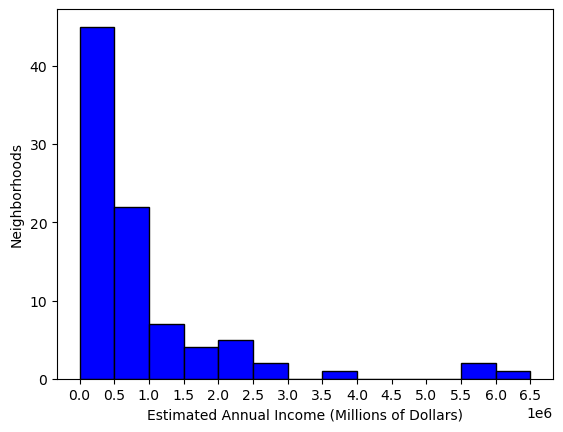

In [106]:
bins = range(0, 6500001, 500000)
plt.hist(income_by_neighborhood['Estimated Annual Income'], bins=bins, color="blue", edgecolor="black")

plt.xticks(bins)

plt.xlabel("Estimated Annual Income (Millions of Dollars)")
plt.ylabel("Neighborhoods")

plt.show()

From the histogram it is clear that the data is heavily skewed right. This is indicative of large income disparity between the average Pittsburgh neighborhood and the highest-earning neighborhoods. 

## Drawing Conclusions

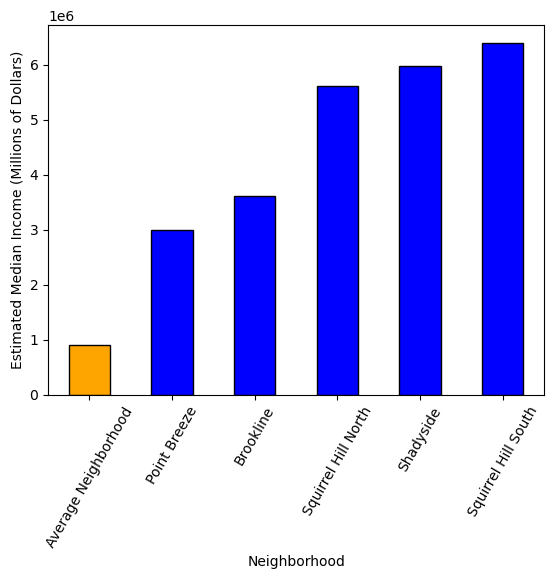

In [105]:
income_by_neighborhood = income_by_neighborhood.sort_values(by="Estimated Annual Income")

average_neighborhood = pd.DataFrame(data={'_id': [-1], 'Neighborhood': ['Average Neighborhood'], 'Id': [-1], 'Estimated Annual Income': [average_median_income], 'Margin of Error': [0]})

top_neighborhoods = pd.concat([average_neighborhood, income_by_neighborhood.tail(5)])

top_neighborhoods.plot(x='Neighborhood', y='Estimated Annual Income', kind='bar', color=['orange', 'blue', 'blue', 'blue', 'blue', 'blue'], edgecolor="black", legend=None)

plt.xticks(rotation=60)

plt.ylabel("Estimated Median Income (Millions of Dollars)")

plt.show()

From this bar graph it is clear that **Squirrel Hill South** has the greatest median annual income, with over six times the median annual income of the average median income. **Shadyside** and **Squirrel Hill North** were close second and third, respectively; however, the difference between **Squirrel Hill South**, first place, and **Squirrel Hill North**, third place, is only about \$500,000 whereas the difference between **Squirrel Hill North**, third place, and **Brookline**, fourth place, is double that at about \$1,000,000. 

Based solely on median annual income, **Squirrel Hill South** is the best in Pittsburgh, however when taking into account other factors a case could be made for either **Squirrel Hill North** or **Brookline**. Based on the harsh disparity between these three top neighborhoods and the rest, however, it i